In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv("Per_ult1_ultimate.csv")
df[[i for i in df.columns if 'per' in i]].describe()

,per_of_RERERETE_semantics_0,per_of_RERERETE_semantics_1,per_of_RERERETE_semantics_2,per_of_RERERETE_semantics_3,per_of_RERERETE_semantics_4,per_of_RERERETE_kwg_0,per_of_RERERETE_kwg_1,per_of_RERERETE_kwg_2,per_of_RERERETE_kwg_3,per_of_RERERETE_kwg_4,...,per_of_RERERETE_SIR_1,per_of_RERERETE_SIR_2,per_of_RERERETE_SIR_3,per_of_RERERETE_SIR_4,per_of_RNormalTranslation_semantics_0,per_of_RNormalTranslation_kwg_0,per_of_RNormalTranslation_sir_0,per_of_RPivotTranslation_semantics_0,per_of_RPivotTranslation_kwg_0,per_of_RPivotTranslation_sir_0
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,45.053815,44.709146,40.937385,35.445877,37.459511,42.506951,33.762669,40.478168,37.400694,39.129153,...,38.602094,33.863961,46.676303,35.903735,54.185726,54.307177,53.122877,54.131676,53.320258,54.874228
std,39.004678,35.830768,34.417608,25.036865,28.224457,26.170242,24.410427,24.690137,27.429625,28.571204,...,25.069317,25.383120,33.473199,25.004257,47.868095,48.773153,46.072697,47.450341,41.066850,47.350531
min,5.695521,7.058970,6.690650,6.296433,6.296433,6.652346,6.173230,6.652346,8.078531,6.652346,...,8.384482,5.822424,8.861480,5.822424,9.477334,8.242137,8.007092,12.752916,9.323277,8.242326
25%,20.923317,23.944107,20.815385,16.912510,17.288947,24.191093,17.222594,23.725855,21.804312,21.544607,...,18.944620,18.014065,22.199394,19.817226,26.211163,25.597847,24.731002,28.824824,26.221711,22.732635
50%,33.428822,33.584003,30.664355,28.321187,28.518443,34.309559,28.346731,32.908724,28.832269,31.476047,...,31.801718,25.498811,39.121670,27.619115,39.262823,39.577257,39.840649,41.295092,41.261217,36.082155
75%,52.144745,50.783721,44.900572,46.559510,46.053268,52.321858,42.798347,48.651948,45.795634,43.117888,...,48.643200,41.099358,59.517983,45.521219,63.263140,62.597472,62.290608,58.352207,60.635207,64.751614
max,227.854034,234.310791,176.275238,123.838623,154.057709,121.490860,157.971359,116.019852,212.866623,148.557739,...,121.396996,151.686554,150.685349,151.686554,279.790955,310.886993,287.683105,361.002045,194.025314,203.917236


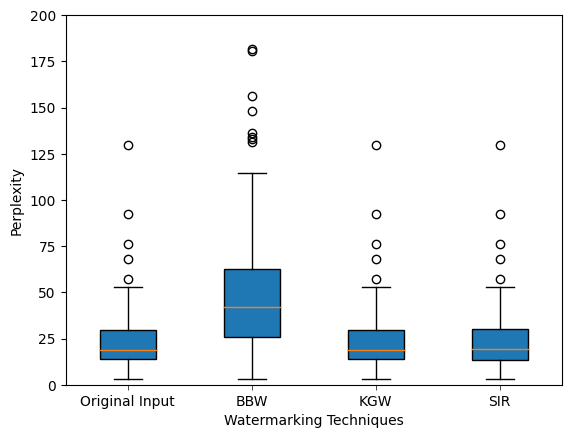

In [45]:
a = []
labels = ['Original Input']
for i in df.columns:
    if 'per_of_en' in i:
        a.append(i)
        if 'kwg' in i:
            labels.append('KGW')
        elif 'semantics' in i:
            labels.append('BBW')
        else:
            labels.append(i.split('_')[-2].upper())
a = ['per_of_inputs_en_0'] + a
plt.tick_params(axis='x', width=0.5)
boxplot = plt.boxplot(df[a], labels = labels,  patch_artist=True, widths=0.45)
plt.ylim(0, 200)  
plt.ylabel("Perplexity")
plt.xlabel("Watermarking Techniques")
plt.savefig('Dataset/Graphs/perp.png')
plt.show()

In [4]:
df = df[df['per_of_en_semantics_0'] != df['per_of_en_semantics_0'].max()]

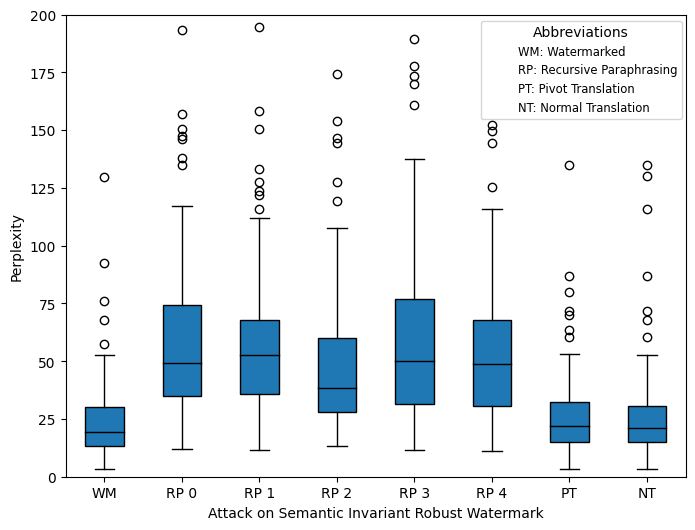

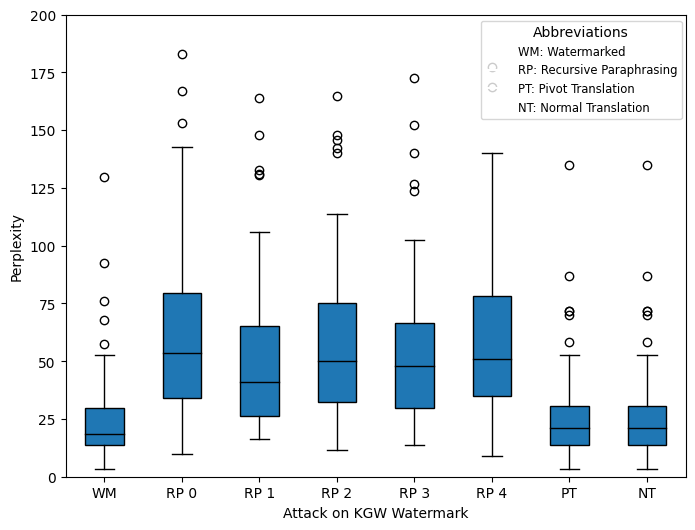

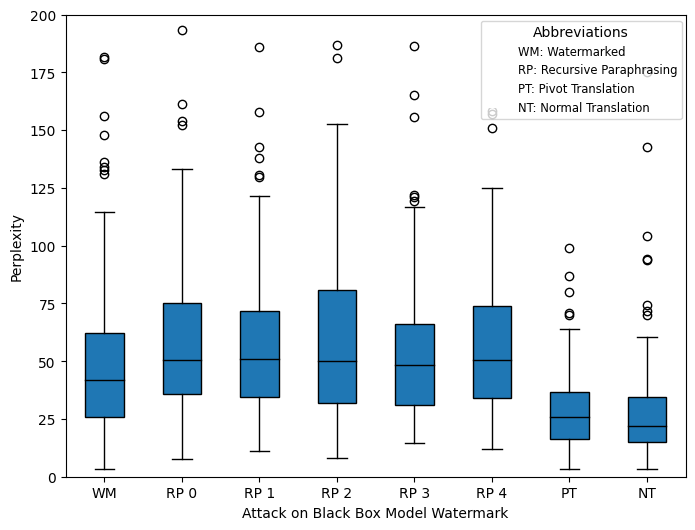

In [38]:
watermarks = ['sir', 'kwg', 'semantics']
for wm in watermarks:
    a = []
    labels = []
    for i in df.columns:
        if 'seq' in i or 'cn' in i:
            continue
        if wm in i.lower():
            a.append(i)
            if 'en' in i:
                labels.append("WM")
            elif 'Para' in i:
                labels.append(" ".join(['RP'] + i.split('_')[-1:]))
            elif 'Pivot' in i:
                labels.append('PT')
            else:
                labels.append('NT')

    watermark_name = 'Semantic Invariant Robust' if wm == 'sir' else 'KGW' if wm == 'kwg' else 'Black Box Model'
    plt.figure(figsize=(8,6))
    plt.ylim(0, 200)  
    plt.ylabel("Perplexity")
    plt.xlabel(f"Attack on {watermark_name} Watermark")
    # colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightseagreen', 'lightpink', 'lightsteelblue', 'lightgray']
    # colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

    boxplot = plt.boxplot(df[a], labels = labels,  patch_artist=True)
    # for patch, color in zip(boxplot['boxes'], colors):
    #     patch.set_facecolor(color)

    for whisker in boxplot['whiskers']:
        whisker.set_color('black')
    for median in boxplot['medians']:
        median.set_color('black')
    plt.xticks(range(1, len(labels) + 1), labels, rotation=0)

    handles = [plt.Line2D([0], [0], color='w', markerfacecolor='b', markersize=10, label='WM: Watermarked'),
               plt.Line2D([0], [0], color='w', markerfacecolor='b', markersize=10, label='RP: Recursive Paraphrasing'),
               plt.Line2D([0], [0], color='w', markerfacecolor='b', markersize=10, label='PT: Pivot Translation'),
               plt.Line2D([0], [0], color='w', markerfacecolor='b', markersize=10, label='NT: Normal Translation')]

    plt.legend(handles=handles, title='Abbreviations', loc='upper left', bbox_to_anchor=(0.66, 1), fontsize='small',)
    # Add legend manually
    # plt.legend(['WM', 'RP 0', 'RP 1', 'RP 2', 'RP 3', 'RP 4', 'PT', 'NT'])

    plt.savefig(f'Dataset/Graphs/{wm}.png')
    plt.show()
    

In [5]:
import json
import os
import pandas as pd
import glob
import pickle

In [6]:
d = {}
dir = 'Dataset/NewDataScores/*/*/*'
for file in glob.glob(dir):
    with open(file, 'rb') as f:
        data = pickle.load(f)
    key = file.lower()
    print(key)
    d[key] = sum(data)/len(data)

dataset/newdatascores/paraphraed_pivottranslation/semantics/llm_watermarked_semantics_pivot_translated_scores.pkl
dataset/newdatascores/paraphraed_pivottranslation/sir/llm_watermarked_sir_pivot_translated_scores.pkl
dataset/newdatascores/paraphraed_pivottranslation/kwg/llm_watermarked_kwg_pivot_translated_scores.pkl
dataset/newdatascores/paraphrased_normaltranslation/semantics/llm_watermarked_semantics_translated_scores.pkl
dataset/newdatascores/paraphrased_normaltranslation/sir/llm_watermarked_sir_translated_scores.pkl
dataset/newdatascores/paraphrased_normaltranslation/kwg/llm_watermarked_kwg_translated_scores.pkl
dataset/newdatascores/translation_paraphrased/semantics/watermark_dipper2_scores.pkl
dataset/newdatascores/translation_paraphrased/semantics/watermark_dipper1_scores.pkl
dataset/newdatascores/translation_paraphrased/semantics/watermark_dipper0_scores.pkl
dataset/newdatascores/translation_paraphrased/semantics/watermark_dipper3_scores.pkl
dataset/newdatascores/translation_pa

In [7]:
col = ['Pivot Translation + paraphrase', 'Normal translation + paraphrase', 'rec_tr0', 'rec_tr1', 'rec_tr2', 'rec_tr3', 'rec_tr4']
s = []
k = []
b = []
for i in sorted(d.keys()):
    print(i, d[i])
    if 'sir' in i:
        s.append(d[i])
    elif 'kwg' in i:
        k.append(d[i])
    else:
        b.append(d[i])

q = pd.DataFrame([s,k , b], index=['SIR', 'KGW' , 'Black Box'],columns  = col)
q

dataset/newdatascores/paraphraed_pivottranslation/kwg/llm_watermarked_kwg_pivot_translated_scores.pkl 19.699988743832918
dataset/newdatascores/paraphraed_pivottranslation/semantics/llm_watermarked_semantics_pivot_translated_scores.pkl 52.01283103625462
dataset/newdatascores/paraphraed_pivottranslation/sir/llm_watermarked_sir_pivot_translated_scores.pkl 12.385194737842475
dataset/newdatascores/paraphrased_normaltranslation/kwg/llm_watermarked_kwg_translated_scores.pkl 41.72545998333427
dataset/newdatascores/paraphrased_normaltranslation/semantics/llm_watermarked_semantics_translated_scores.pkl 64.98584115018355
dataset/newdatascores/paraphrased_normaltranslation/sir/llm_watermarked_sir_translated_scores.pkl 11.260316548018723
dataset/newdatascores/translation_paraphrased/kwg/rephrased0_scores.pkl 41.50331931896218
dataset/newdatascores/translation_paraphrased/kwg/rephrased1_scores.pkl 31.71027951627192
dataset/newdatascores/translation_paraphrased/kwg/rephrased2_scores.pkl 24.2036637919

,Pivot Translation + paraphrase,Normal translation + paraphrase,rec_tr0,rec_tr1,rec_tr2,rec_tr3,rec_tr4
SIR,12.385195,11.260317,13.357434,12.945792,11.709901,13.563280,13.579691
KGW,19.699989,41.725460,41.503319,31.710280,24.203664,21.470526,21.250810
Black Box,52.012831,64.985841,75.047878,66.752029,57.300735,57.708208,55.251461


In [8]:
directory = 'Dataset/conf'
files = os.listdir(directory)
dfs = []
for file in files:
    with open(os.path.join(directory, file)) as f:
        a = json.load(f)
    df = pd.DataFrame(a)
    df = df.add_prefix(file.split('_')[1].split('.')[0] + '_')
    dfs.append([file,df])

In [12]:
dfs

[['semantics_translated.json',
      translated_original  translated_watermarked  translated_attacked0
  0                 71.81                  100.00                 77.72
  1                 63.06                   99.02                 50.00
  2                 44.43                   99.98                 20.27
  3                 56.71                   99.93                 84.83
  4                 28.54                  100.00                 42.57
  ..                  ...                     ...                   ...
  95                46.11                  100.00                 84.13
  96                 8.88                  100.00                 97.11
  97                54.32                  100.00                 99.02
  98                19.81                   99.99                 98.03
  99                57.63                  100.00                 38.15
  
  [100 rows x 3 columns]],
 ['kwg_pivot_translated.json',
      pivot_original  pivot_watermarked  piv

In [9]:
kwg = None
sir = None
sem = None
for i in range(len(dfs)):
    if 'kwg' in dfs[i][0]:
        if kwg is None:
            kwg = dfs[i][1]
        else:
            kwg = pd.concat([kwg, dfs[i][1]], axis = 1)
    elif 'sir' in dfs[i][0]:
        if sir is None:
            sir = dfs[i][1]
        else:
            sir = pd.concat([sir, dfs[i][1]], axis = 1)

    else:
        if sem is None:
            sem = dfs[i][1]
        else:
            sem = pd.concat([sem, dfs[i][1]], axis = 1)
        # print(dfs[i][1])
kwg = kwg[['pivot_original', 'pivot_watermarked'] + [i for i in kwg.columns if 'original' not in i and 'watermarked' not in i]]
sir = sir[['pivot_original', 'pivot_watermarked'] + [i for i in sir.columns if 'original' not in i and 'watermarked' not in i]]
sem = sem[['pivot_original', 'pivot_watermarked'] + [i for i in sem.columns if 'original' not in i and 'watermark' not in i]]


In [10]:
b = []
for df in [kwg, sir, sem]:
    a = []
    for i in kwg.columns:
        a.append(df[i].mean())
    b.append(a)


In [13]:
kwg.columns

Index(['pivot_original', 'pivot_watermarked', 'pivot_attacked0',
       'recursive_attacked0', 'recursive_attacked1', 'recursive_attacked2',
       'recursive_attacked3', 'recursive_attacked4', 'translated_attacked0'],
      dtype='object')

In [14]:
col_map = {'pivot_original' : 'Original', 'pivot_watermarked' : 'Watermarked', 'pivot_attacked0' : 'Pivot Attack',
       'recursive_attacked0' : 'Recursive Attack 1', 'recursive_attacked1' : 'Recursive Attack 2', 'recursive_attacked2' : 'Recursive Attack 3',
       'recursive_attacked3' : 'Recursive Attack 4', 'recursive_attacked4' : 'Recursive Attack 5', 'translated_attacked0' : 'Translation Attack'}

In [15]:
col = []
for c in kwg.columns:
    col.append(col_map[c]) 
ind = ['KGW', 'SIR', 'Black Box']

In [16]:
table = pd.DataFrame(b, index=ind, columns=col)

In [25]:
tati = table.T
tt = pd.concat([tati , q.T]  , axis = 0)
tt.to_csv("a.csv")

In [2]:
final = pd.read_csv("a.csv", index_col = 0)
final

,KGW,SIR,Black Box
Original,16.696966,28.602707,50.022400
Watermarked,93.643111,83.479007,92.995800
Pivot Attack,39.030686,25.916131,52.593800
Recursive Attack 1,60.203086,61.097640,91.245900
Recursive Attack 2,36.853426,51.584850,78.189000
Recursive Attack 3,26.887068,44.338295,68.124900
Recursive Attack 4,22.775357,41.077246,66.839100
Recursive Attack 5,16.858977,36.244709,62.532100
Translation Attack,82.447881,61.810258,82.971600
Pivot Translation + paraphrase,19.699989,12.385195,52.012831


In [1]:
import json
import pandas as pd
import glob
import pickle
import numpy as np

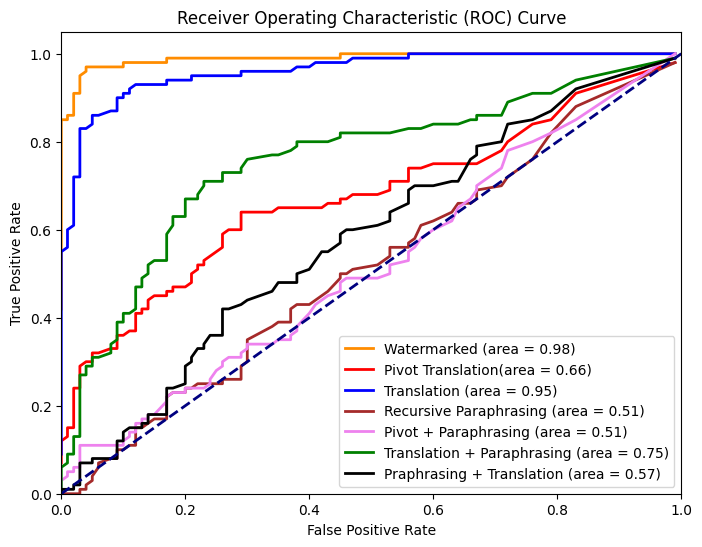

In [97]:
files_new = []
for i in glob.glob('Dataset/NewDataScores/*/kwg/*'):
    if 'rephrased' in i:
        if '4' not in i:
            continue
    files_new.append(i)

files_old = [i for i in glob.glob('Dataset/conf/*') if 'kwg' in i]

scores = []
for i in files_new:
    with open(i, 'rb') as f:
        scores_new = pickle.load(f)
    name = i.split('/')[2]
    scores.append([name, scores_new])
    
tp_ppt = []
tp_pnt = []
tp_tp = []

for i in range(0, 1000, 5):
    threshold = i/10
    tp_ppt.append(sum(scores[0][1] > threshold)/100)
    tp_pnt.append(sum(scores[1][1] > threshold)/100)
    tp_tp.append(sum(scores[2][1] > threshold)/100)
with open('Dataset/conf/kwg_pivot_translated.json') as f:
    a = json.load(f)
a = pd.DataFrame(a)
with open('Dataset/conf/kwg_translated.json') as f:
    aa = json.load(f)
b = pd.DataFrame(aa)
with open('Dataset/conf/kwg_recursive.json') as f:
    aa = json.load(f)
c = pd.DataFrame(aa)

fp = []
tp = []
tp_a_pt = []
tp_a_t = []
tp_a_r = []

for i in range(0, 1000, 5):
    threshold = i/10
    false_pos = a[a['original'] > threshold]['original'].count() / 100
    true_pos = a[a['watermarked'] > threshold]['watermarked'].count() / 100
    true_pos_at = a[a['attacked0'] > threshold]['attacked0'].count() / 100
    tp_a_pt.append(true_pos_at)
    true_pos_at = b[b['attacked0'] > threshold]['attacked0'].count() / 100
    tp_a_t.append(true_pos_at)
    true_pos_at = c[c['attacked4'] > threshold]['attacked4'].count() / 100
    tp_a_r.append(true_pos_at)

    fp.append(false_pos)
    tp.append(true_pos)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

roc_auc = auc(fp, tp)
roc_auc_11 = auc(fp, tp_a_pt)
roc_auc_12 = auc(fp, tp_a_t)
roc_auc_13 = auc(fp, tp_a_r)

roc_auc_2 = auc(fp, tp_ppt)
roc_auc_3 = auc(fp, tp_pnt)
roc_auc_4 = auc(fp, tp_tp)

# Plot ROC curve
plt.figure(figsize=(8,6))

plt.plot(fp, tp, color='darkorange', lw=2, label='Watermarked (area = %0.2f)' % roc_auc)
plt.plot(fp, tp_a_pt, color='red', lw=2, label='Pivot Translation(area = %0.2f)' % roc_auc_11)
plt.plot(fp, tp_a_t, color='blue', lw=2, label='Translation (area = %0.2f)' % roc_auc_12)
plt.plot(fp, tp_a_r, color='brown', lw=2, label='Recursive Paraphrasing (area = %0.2f)' % roc_auc_13)

plt.plot(fp, tp_ppt, color='violet', lw=2, label='Pivot + Paraphrasing (area = %0.2f)' % roc_auc_2)
plt.plot(fp, tp_pnt, color='green', lw=2, label='Translation + Paraphrasing (area = %0.2f)' % roc_auc_3)
plt.plot(fp, tp_tp, color='black', lw=2, label='Praphrasing + Translation (area = %0.2f)' % roc_auc_4)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

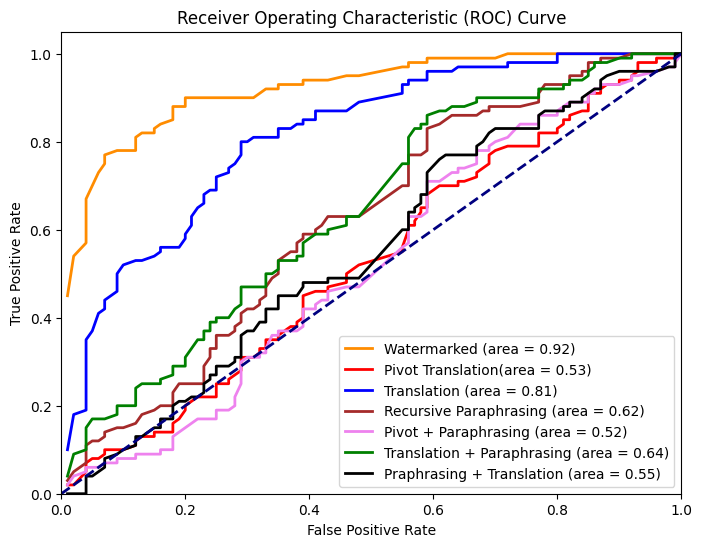

In [116]:
files_new = []
for i in glob.glob('Dataset/NewDataScores/*/semantics/*'):
    if 'dipper' in i:
        if '4' not in i:
            continue
    files_new.append(i)

scores = []
for i in files_new:
    with open(i, 'rb') as f:
        scores_new = pickle.load(f)
    name = i.split('/')[2]
    scores.append([name, np.array(scores_new)])
    
tp_ppt = []
tp_pnt = []
tp_tp = []

for i in range(0, 1000, 5):
    threshold = i/10
    tp_ppt.append(sum(scores[0][1] > threshold)/100)
    tp_pnt.append(sum(scores[1][1] > threshold)/100)
    tp_tp.append(sum(scores[2][1] > threshold)/100)
    
with open('Dataset/conf/semantics_pivot_translated.json') as f:
    a = json.load(f)
a = pd.DataFrame(a)
with open('Dataset/conf/semantics_translated.json') as f:
    aa = json.load(f)
b = pd.DataFrame(aa)
with open('Dataset/conf/semantics_recursive.json') as f:
    aa = json.load(f)
c = pd.DataFrame(aa)

fp = []
tp = []
tp_a_pt = []
tp_a_t = []
tp_a_r = []

for i in range(0, 1000, 5):
    threshold = i/10
    false_pos = a[a['original'] > threshold]['original'].count() / 100
    true_pos = a[a['watermarked'] > threshold]['watermarked'].count() / 100
    true_pos_at = a[a['attacked0'] > threshold]['attacked0'].count() / 100
    tp_a_pt.append(true_pos_at)
    true_pos_at = b[b['attacked0'] > threshold]['attacked0'].count() / 100
    tp_a_t.append(true_pos_at)
    true_pos_at = c[c['attacked4'] > threshold]['attacked4'].count() / 100
    tp_a_r.append(true_pos_at)

    fp.append(false_pos)
    tp.append(true_pos)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

roc_auc = auc(fp, tp)
roc_auc_11 = auc(fp, tp_a_pt)
roc_auc_12 = auc(fp, tp_a_t)
roc_auc_13 = auc(fp, tp_a_r)

roc_auc_2 = auc(fp, tp_ppt)
roc_auc_3 = auc(fp, tp_pnt)
roc_auc_4 = auc(fp, tp_tp)

# Plot ROC curve
plt.figure(figsize=(8,6))

plt.plot(fp, tp, color='darkorange', lw=2, label='Watermarked (area = %0.2f)' % roc_auc)
plt.plot(fp, tp_a_pt, color='red', lw=2, label='Pivot Translation(area = %0.2f)' % roc_auc_11)
plt.plot(fp, tp_a_t, color='blue', lw=2, label='Translation (area = %0.2f)' % roc_auc_12)
plt.plot(fp, tp_a_r, color='brown', lw=2, label='Recursive Paraphrasing (area = %0.2f)' % roc_auc_13)

plt.plot(fp, tp_ppt, color='violet', lw=2, label='Pivot + Paraphrasing (area = %0.2f)' % roc_auc_2)
plt.plot(fp, tp_pnt, color='green', lw=2, label='Translation + Paraphrasing (area = %0.2f)' % roc_auc_3)
plt.plot(fp, tp_tp, color='black', lw=2, label='Praphrasing + Translation (area = %0.2f)' % roc_auc_4)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

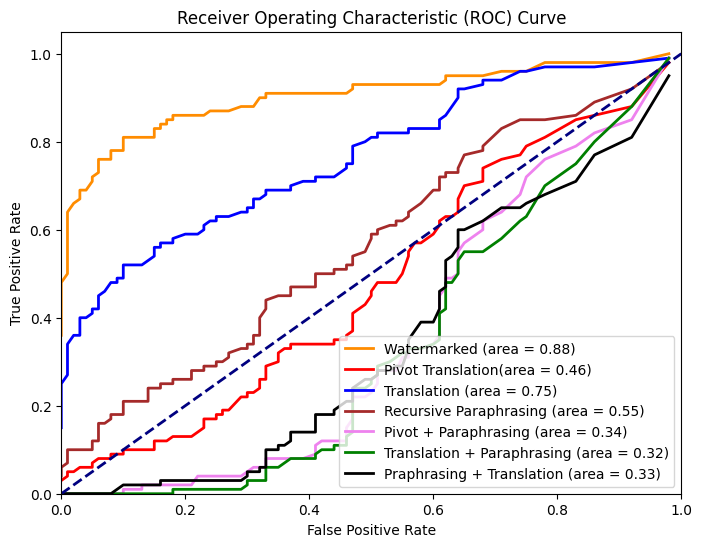

In [121]:
files_new = []
for i in glob.glob('Dataset/NewDataScores/*/SIR/*'):
    if 'rephrased' in i:
        if '4' not in i:
            continue
    files_new.append(i)
    
for i in glob.glob('Dataset/NewDataScores/*/sir/*'):
    if 'rephrased' in i:
        if '4' not in i:
            continue
    files_new.append(i)

scores = []
for i in files_new:
    with open(i, 'rb') as f:
        scores_new = pickle.load(f)
    name = i.split('/')[2]
    scores.append([name, np.array(scores_new)])
    
tp_ppt = []
tp_pnt = []
tp_tp = []

for i in range(0, 1000, 5):
    threshold = i/10
    tp_ppt.append(sum(scores[1][1] > threshold)/100)
    tp_pnt.append(sum(scores[2][1] > threshold)/100)
    tp_tp.append(sum(scores[0][1] > threshold)/100)
    
with open('Dataset/conf/sir_pivot_translated.json') as f:
    a = json.load(f)
a = pd.DataFrame(a)
with open('Dataset/conf/sir_translated.json') as f:
    aa = json.load(f)
b = pd.DataFrame(aa)
with open('Dataset/conf/sir_recursive.json') as f:
    aa = json.load(f)
c = pd.DataFrame(aa)

fp = []
tp = []
tp_a_pt = []
tp_a_t = []
tp_a_r = []

for i in range(0, 1000, 5):
    threshold = i/10
    false_pos = a[a['original'] > threshold]['original'].count() / 100
    true_pos = a[a['watermarked'] > threshold]['watermarked'].count() / 100
    true_pos_at = a[a['attacked0'] > threshold]['attacked0'].count() / 100
    tp_a_pt.append(true_pos_at)
    true_pos_at = b[b['attacked0'] > threshold]['attacked0'].count() / 100
    tp_a_t.append(true_pos_at)
    true_pos_at = c[c['attacked4'] > threshold]['attacked4'].count() / 100
    tp_a_r.append(true_pos_at)

    fp.append(false_pos)
    tp.append(true_pos)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

roc_auc = auc(fp, tp)
roc_auc_11 = auc(fp, tp_a_pt)
roc_auc_12 = auc(fp, tp_a_t)
roc_auc_13 = auc(fp, tp_a_r)

roc_auc_2 = auc(fp, tp_ppt)
roc_auc_3 = auc(fp, tp_pnt)
roc_auc_4 = auc(fp, tp_tp)

# Plot ROC curve
plt.figure(figsize=(8,6))

plt.plot(fp, tp, color='darkorange', lw=2, label='Watermarked (area = %0.2f)' % roc_auc)
plt.plot(fp, tp_a_pt, color='red', lw=2, label='Pivot Translation(area = %0.2f)' % roc_auc_11)
plt.plot(fp, tp_a_t, color='blue', lw=2, label='Translation (area = %0.2f)' % roc_auc_12)
plt.plot(fp, tp_a_r, color='brown', lw=2, label='Recursive Paraphrasing (area = %0.2f)' % roc_auc_13)

plt.plot(fp, tp_ppt, color='violet', lw=2, label='Pivot + Paraphrasing (area = %0.2f)' % roc_auc_2)
plt.plot(fp, tp_pnt, color='green', lw=2, label='Translation + Paraphrasing (area = %0.2f)' % roc_auc_3)
plt.plot(fp, tp_tp, color='black', lw=2, label='Praphrasing + Translation (area = %0.2f)' % roc_auc_4)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()